    Titanic Data를 사용해서 '생존자 예측과 분석' 대한 report
      i) Data loding : https://www.kaggle.com/c/titanic 의 데이터
         - Down load 후 uploding : train data, test data
           train data : 891행, 12열 
           test data  : 418행 , 11열 (Survived열 제외)
      ii) 결측치 data 확인 : 나이 :평균 대체 (train data,test data) , Embarked : S 대체
         - train data : Age:나이 (177/891,19.9%), Cabin:호실(687/891, 77%), Embarked:출발항(2/891, 0.2%)
                        생존한 사람을 삭제하면 생존자 분석시 결과에 영향을 미치므로 값 대체 
                        #출발항 null data(2건) : 여성이고 1class이고 요금 80달러 지불 ... DATA 많은 S으로 수정 
         - test data   : Age:나이 (86/418,20%), Cabin:호실(327/418, 78%), Embarked:출발항(0%), Fare:요금(1/418,0.2%)
      III) 중복DATA 없슴
      iii) 분석 : 이후 train_data1 사용
         - 컬럼 추가 : Age-G > 나이별 그래프 작성 목적
         - train_data.describe():요약통계 : 나이( 평균 29살 , 4분위 20 -28 - 38살) ,요금( 평균 32달러, 4분위 : 7-14-31)
         - train_data.corr(): 클라스와 요금 관계 , 가족간의 상관관계 중간정도 , 해석은 안됨(?)
         - 생존 분석 : 생존 38.4%
           . 생존 : 사망 549명(61.6%) , 생존 342명(38.4%)
           . 여성생존자 비율 높음 : 여성( 233/314=74% ), 남(109/577 = 18.8%)  
           . class별 생존자수     : 3class 남자 사망비율 높음(1클라스 (80/216)= 37% , 2클라스 (97/184)=52.7% , 3클라스 (372/491)=76%)
           . 나이별 생존자수      : 20대(71/155=61.7%),30대 사망비율이 높음(146/230= 63.4%),10대 생존비율이 높음 38/64=59.3%
           . 출발항 생존자수      : Southampton 사망비율 높음(C(Cherbourg)44.6%(55), Q(Queenstown)61%(49) , S(Southampton)66.3%(44))
       iv) 정규화 
          - age 이상치 : 2시그마에서 27개 , 3시그마에서 2개 
          - age만 정규화 하였슴 
        v) 모델 생성 
          - 컬럼 삭제 :'PassengerId','Survived','Name','Ticket','Cabin','Age_G' 
                        PassengerId','Name','Ticket','Cabin' 영향무, 'Age_G'는 그래프 작성 목적, Survived는 target data
          - 회귀, 의사결정나무, svc 모델 훈련 : 의사결정나무 (95.7점) 선정 
            > test_data 예측 결과 100점 (?????)

In [248]:
# 라이브러리 import 및 DATA LODING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

train_path = os.getenv("HOME") + "/aiffel/98a_aiff_report_titanic/train.csv"
test_path = os.getenv("HOME") + "/aiffel/98a_aiff_report_titanic/test.csv"

train_data = pd.read_csv(train_path)
train_data1 = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [249]:
# train data 확인 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
# test data 확인 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [251]:
# TRAIN DATA 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [252]:
# TRAIN DATA NULL : Age : 177 , Cabin : 687 ,  Embarked  : 2
len(train_data)-train_data.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [253]:
# TRAIN DATA NULL : Age : 177 , Cabin : 687 ,  Embarked  : 2
len(test_data)-test_data.count()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [254]:
# TRAIN DATA NULL
train_data[train_data.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [255]:
#train_data age 평균 대체 
train_data.loc[(train_data.Age.isnull()),'Age']=train_data['Age'].mean()

In [256]:
#test_data age 평균 대체 
test_data.loc[(test_data.Age.isnull()),'Age']=test_data['Age'].mean()

In [257]:
#출발항 null인 data 확인 2건 : S로 수정 DATA가 많은 
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [259]:
#결측치 수정  train_data
train_data.loc[61,'Embarked'] = 'S'
train_data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

In [260]:
#TEST DATA FARE 삭제
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [261]:
#TEST DATA FARE 삭제
test_data=test_data.drop([152], axis = 0)   

In [262]:
#중복DATA 없음
train_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [263]:
#중복DATA 없음
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [264]:
# TRAIN DATA 요약 통계   나이( 평균 29살 , 4분위 20 -28 - 38살) ,요금( 평균 32달러, 4분위 : 7-14-31)
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [266]:
# TRAIN DATA 상관관계 > 클라스와 요금 관계 , 가족간의 상관관계 상당함 
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [267]:
#  컬럼 추가 : Age_G
train_data['Age_G'] = pd.cut(train_data['Age'], 8, labels=['10','20', '30', '40', '50', '60','70','80'])
train_data[['Age', 'Age_G']].head()

,Age,Age_G
0,22.0,30
1,38.0,40
2,26.0,30
3,35.0,40
4,35.0,40


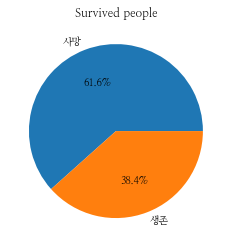

In [268]:
#  생존자 현황 : 사망 61.6% , 생존 38.4%
fig = plt.figure(figsize=(10,4))

plt.rc('font', family='NanumMyeongjo')
labels = ['사망','생존'] 

pie_data = train_data.groupby(['Survived']).count().Name
plt.pie(pie_data, labels=labels, autopct = '%1.1f%%')
plt.title('Survived people')
plt.show()

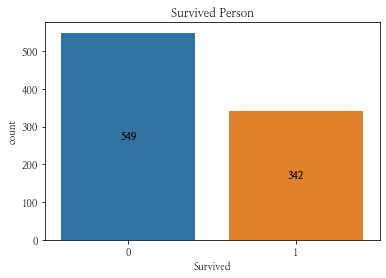

In [269]:
#생존자 현황  사망 549명 , 생존 342명
ax = sns.countplot(data=train_data, x='Survived')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Person')
plt.show()


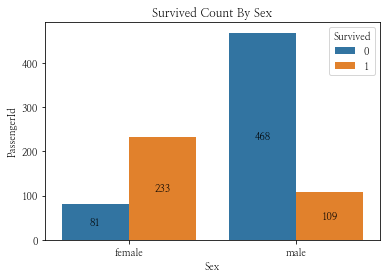

In [270]:
# 성별 생존자수 ?그래프 모른다 확인 필요  : 여성생존자 비율 높음 >여성( 233/314=74% ) 남(109/577 = 18.8%)  
grouped = train_data['PassengerId'].groupby([train_data['Sex'], train_data['Survived']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='Sex', y='PassengerId', hue='Survived')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Count By Sex')
plt.show()

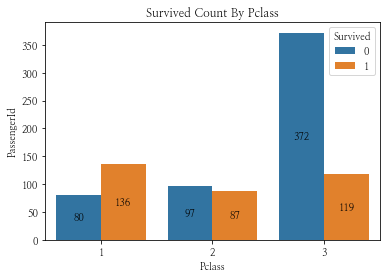

In [271]:
# Pclass별 생존자수 3등급 남자 사망비율 높음 :( 1클라스 (80/216)= 37% , 2클라스 (97/184)=52.7% , 3클라스 (372/491)=76%
grouped = train_data['PassengerId'].groupby([train_data['Pclass'], train_data['Survived']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='Pclass', y='PassengerId', hue='Survived')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Count By Pclass')
plt.show()

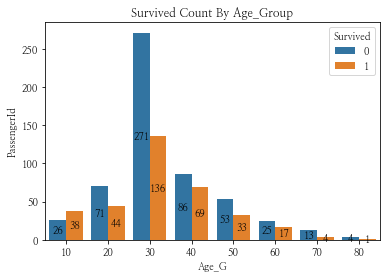

In [272]:
# Age_G별 생존자수  20대(71/155=61.7%)30대 사망비율이 높음(146/230= 63.4%)86/155=, 10대 생존비율이 높음 38/64=59.3%
grouped = train_data['PassengerId'].groupby([train_data['Age_G'], train_data['Survived']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='Age_G', y='PassengerId', hue='Survived')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Count By Age_Group')
plt.show()

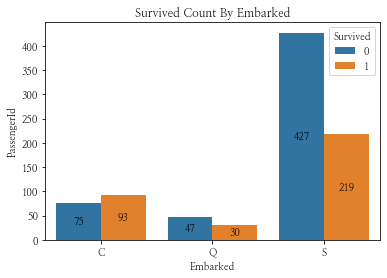

In [273]:
# 출발항별  생존자수 선착장 : Southampton 사망비율 높음 : C(Cherbourg) 44.6% (55), Q(Queenstown) 61%(49) , S(Southampton) 66.3%(44)
grouped = train_data['PassengerId'].groupby([train_data['Embarked'], train_data['Survived']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='Embarked', y='PassengerId', hue='Survived')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Count By Embarked')
plt.show()

In [274]:
# 이상치 확인 : Pclass 이상치 없음(95% 수준), age(95% 초과 : 69개  )
def outlier(train_data, col, z):
    return train_data[abs(train_data1[col] - np.mean(train_data[col]))/np.std(train_data[col])>z].index

#train_data.loc[outlier(train_data, 'Age', 1.5)]
train_data.loc[outlier(train_data, 'Age', 2)]
#train_data.loc[outlier(train_data, 'Age', 3)]
#Pclass       Sex          Age_G        Age          

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_G
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,10
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,60
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,10
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S,70
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,10
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S,70
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,10
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S,80


In [275]:
#정규화 , Age만 정규화 
cols = ['Age']
trade_Standardization= (train_data[cols]-train_data[cols].mean())/train_data[cols].std()
trade_Standardization.head()

trade_Standardization.describe()


,Age
count,8.910000e+02
mean,2.272780e-16
std,1.000000e+00
min,-2.251891e+00
25%,-5.921480e-01
50%,0.000000e+00
75%,4.076970e-01
max,3.868699e+00


In [276]:
#target 분리
train_target = train_data['Survived']
train_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [277]:
train_target.shape

(891,)

In [278]:
train_target =  np.array(train_target)
train_target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [279]:
# 컬럼 삭제 :'PassengerId','Survived','Name','Ticket','Cabin','Age_G'
drop_column2 = ['PassengerId','Survived','Name','Ticket','Cabin','Age_G' ]
train_data = train_data.drop(drop_column2, axis=1)
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [280]:
# 컬럼 삭제 : PassengerId, Survived   name,ticket, cabin   - Cabin- Name- PassengerId- Ticket
drop_column2 = ['PassengerId', 'Name', 'Cabin','Ticket']
test_data = test_data.drop(drop_column2, axis=1)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [281]:
# Sex, Embarked 수치화 
train_data['Sex'] = pd.factorize(train_data.Embarked)[0]
train_data['Embarked'] = pd.factorize(train_data.Embarked)[0]
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [282]:
# Sex, Embarked 수치화 
test_data['Sex'] = pd.factorize(test_data.Embarked)[0]
test_data['Embarked'] = pd.factorize(test_data.Embarked)[0]
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,0
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,0
3,3,1,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,1
414,1,2,39.00000,0,0,108.9000,2
415,3,1,38.50000,0,0,7.2500,1
416,3,1,30.27259,0,0,8.0500,1


In [283]:
#재확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [284]:
#재확인
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [285]:
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.naive_bayes import GaussianNB # 나이브 베이즈 분류
from sklearn.svm import SVC # 서포트 벡터 머신
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

In [291]:
model = LogisticRegression()
model.fit(train_data, train_target)
model.score(train_data, train_target)

0.7182940516273849

In [294]:
model = DecisionTreeClassifier()
model.fit(train_data, train_target)
model.score(train_data, train_target)

0.957351290684624

In [296]:
model = RandomForestClassifier()
model.fit(train_data, train_target)
model.score(train_data, train_target)

0.957351290684624

In [297]:
model = SVC()
model.fit(train_data, train_target)
model.score(train_data, train_target)

0.6790123456790124

In [300]:
model = DecisionTreeClassifier()
model.fit(train_data, train_target)
#test_data = test.drop("PassengerId", axis=1)
predict = model.predict(test_data)
model.score(test_data, predict)

1.0